In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


C:\Users\Hp OMEN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_examples = pd.read_parquet('shopping_queries_dataset_examples.parquet')
df_products = pd.read_parquet('shopping_queries_dataset_products.parquet')
df_sources = pd.read_csv("shopping_queries_dataset_sources.csv")

In [3]:
df_examples_products = pd.merge(
    df_examples,
    df_products,
    how='left',
    left_on=['product_locale','product_id'],
    right_on=['product_locale', 'product_id']
)

In [4]:
data = df_examples_products[df_examples_products["small_version"] == 1]
# df_task_1_train = df_task_1[df_task_1["split"] == "train"]
# df_task_1_test = df_task_1[df_task_1["split"] == "test"]

In [5]:
# Combine product_title and product_description
data['combined_text'] = data['product_title'].astype(str) + ' ' + data['product_description'].astype(str)

C:\Users\Hp OMEN\AppData\Local\Temp\ipykernel_21632\2094164588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined_text'] = data['product_title'].astype(str) + ' ' + data['product_description'].astype(str)


In [13]:
# Text preprocessing
stop_words = set(ENGLISH_STOP_WORDS)
ps = PorterStemmer()
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = ''.join(e for e in text if (e.isalnum() or e.isspace()))
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Perform stemming (you can use lemmatization instead if you prefer)
    text = ' '.join(ps.stem(word) for word in text.split())
    return text

# Apply text preprocessing to the combined_text column
data['processed_text'] = data['combined_text'].apply(preprocess_text)


C:\Users\Hp OMEN\AppData\Local\Temp\ipykernel_21632\3019381418.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['combined_text'].apply(preprocess_text)


In [14]:
data.to_csv('processedData.csv', index=False)

In [15]:
data = pd.read_csv("processedData.csv")

In [17]:
data

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color,combined_text,processed_text
0,16,!awnmower tires without rims,1,B075SCHMPY,us,I,1,1,train,"RamPro 10"" All Purpose Utility Air Tires/Wheel...","<b>About The Ram-Pro All Purpose Utility 10"" A...",✓ The Ram-Pro Ten Inch ready to install Air Ti...,RamPro,10 Inch,"RamPro 10"" All Purpose Utility Air Tires/Wheel...",rampro 10 purpos util air tireswheel 58 diamet...
1,17,!awnmower tires without rims,1,B08L3B9B9P,us,E,1,1,train,MaxAuto 2-Pack 13x5.00-6 2PLY Turf Mower Tract...,MaxAuto 2-Pack 13x5.00-6 2PLY Turf Mower Tract...,Please check your existing tire Sidewall for t...,MaxAuto,NaN,MaxAuto 2-Pack 13x5.00-6 2PLY Turf Mower Tract...,maxauto 2pack 13x5006 2pli turf mower tractor ...
2,18,!awnmower tires without rims,1,B082K7V2GZ,us,I,1,1,train,NEIKO 20601A 14.5 inch Steel Tire Spoon Lever ...,NaN,[QUALITY]: Hardened Steel-Iron construction wi...,Neiko,NaN,NEIKO 20601A 14.5 inch Steel Tire Spoon Lever ...,neiko 20601a 145 inch steel tire spoon lever i...
3,19,!awnmower tires without rims,1,B07P4CF3DP,us,S,1,1,train,2PK 13x5.00-6 13x5.00x6 13x5x6 13x5-6 2PLY Tur...,"Tire Size: 13 x 5.00 - 6 Axle: 3/4"" inside dia...",NaN,Russo,NaN,2PK 13x5.00-6 13x5.00x6 13x5x6 13x5-6 2PLY Tur...,2pk 13x5006 13x500x6 13x5x6 13x56 2pli turf mo...
4,20,!awnmower tires without rims,1,B07C1WZG12,us,E,1,1,train,(Set of 2) 15x6.00-6 Husqvarna/Poulan Tire Whe...,No fuss. Just take off your old assembly and r...,Tire size:15x6.00-6 Ply: 4 Tubeless\n6x4.5 Whe...,Antego Tire & Wheel,Husqvarna Silver,(Set of 2) 15x6.00-6 Husqvarna/Poulan Tire Whe...,set 2 15x6006 husqvarnapoulan tire wheel assi ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118006,2621251,ﾒｽﾃｨﾝ,130649,B0719GBJW2,jp,E,1,1,train,MiliCamp キャンプ用 メスティン アウトドア炊飯 飯盒 バリ取り不要 登山 山飯 M...,<p><b>☞キャンプ料理に役立つアウトドアクッカー </b><br></p><p>熱伝導率...,【商品仕様】サイズ：16.5x9.5x6.5cm 重さ：約165g 容量：800ml 素材：...,MiliCamp,2点セット,MiliCamp キャンプ用 メスティン アウトドア炊飯 飯盒 バリ取り不要 登山 山飯 M...,milicamp キャンプ用 メスティン アウトドア炊飯 飯盒 バリ取り不要 登山 山飯 m...
1118007,2621252,ﾒｽﾃｨﾝ,130649,B000O1PKEG,jp,E,1,1,train,trangia(トランギア) ラージメスティン,NaN,サイズ:20.7×13.5×7cm\n重量:270g\n容量:1350mℓ\nアルミ製(無垢...,trangia(トランギア),レギュラーハンドル,trangia(トランギア) ラージメスティン None,trangiaトランギア ラージメスティン
1118008,2621253,ﾒｽﾃｨﾝ,130649,B000AQXZH4,jp,E,1,1,train,trangia(トランギア) メスティン TR-210 【日本正規品】,NaN,サイズ/16.5×9.0×6.5cm。重量160g。\nアルミ無垢,trangia(トランギア),レギュラーハンドル,trangia(トランギア) メスティン TR-210 【日本正規品】 None,trangiaトランギア メスティン tr210 日本正規品
1118009,2621254,ﾒｽﾃｨﾝ,130649,B000AQXWDG,jp,C,1,1,train,Esbit(エスビット) ポケットストーブミリタリー(固形燃料14g×6個付) ES2192...,NaN,原産国:ドイツ\nサイズ:収納時10cm×7.7cm×2.3cm\n本体重さ:85g\n固形...,エスビット(Esbit),マルチ,Esbit(エスビット) ポケットストーブミリタリー(固形燃料14g×6個付) ES2192...,esbitエスビット ポケットストーブミリタリー固形燃料14g6個付 es21920000


In [19]:
# Drop rows with missing values in the 'processed_text' column
data = data.dropna(subset=['processed_text'])

print("Dropped NaN processed_text Rows")

# Convert text data to numerical representations using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_text']).toarray()

Dropped NaN processed_text Rows


In [23]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['esci_label'])

# Divide the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes for E/S/C/I

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
import gc

del X_tfidf
del y_encoded
del X_temp
del y_temp
del data

gc.collect()

868

In [57]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
24452/24452 [==============================] - 96s 4ms/step - loss: 1.1533 - accuracy: 0.4452 - val_loss: 1.1498 - val_accuracy: 0.4452
Epoch 2/10
24452/24452 [==============================] - 92s 4ms/step - loss: 1.1379 - accuracy: 0.4547 - val_loss: 1.1458 - val_accuracy: 0.4477
Epoch 3/10
24452/24452 [==============================] - 90s 4ms/step - loss: 1.1232 - accuracy: 0.4643 - val_loss: 1.1439 - val_accuracy: 0.4496
Epoch 4/10
24452/24452 [==============================] - 92s 4ms/step - loss: 1.1085 - accuracy: 0.4739 - val_loss: 1.1472 - val_accuracy: 0.4486
Epoch 5/10
24452/24452 [==============================] - 92s 4ms/step - loss: 1.0955 - accuracy: 0.4831 - val_loss: 1.1537 - val_accuracy: 0.4461
Epoch 6/10
24452/24452 [==============================] - 92s 4ms/step - loss: 1.0841 - accuracy: 0.4903 - val_loss: 1.1575 - val_accuracy: 0.4476
Epoch 7/10
24452/24452 [==============================] - 93s 4ms/step - loss: 1.0739 - accuracy: 0.4969 - val_loss: 1

5240/5240 [==============================] - 9s 2ms/step
[[0.04628905 0.44329366 0.18529978 0.3251175 ]
 [0.06356141 0.60083336 0.06452313 0.27108213]
 [0.01776158 0.37993288 0.03485275 0.56745285]
 ...
 [0.06404275 0.5343746  0.31955588 0.08202681]
 [0.09354318 0.41630572 0.20366615 0.2864849 ]
 [0.02250371 0.14343068 0.4289922  0.40507337]]
[3 3 1 ... 3 2 1]
Precision: 0.4167
Recall: 0.4416
F1 Score: 0.3977


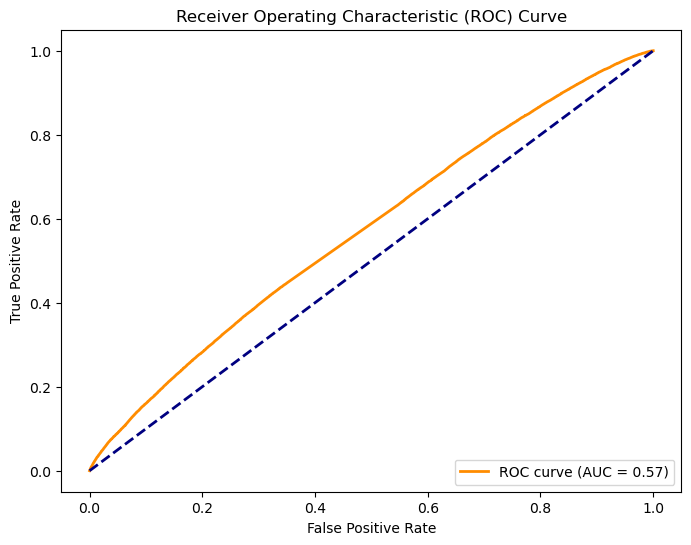

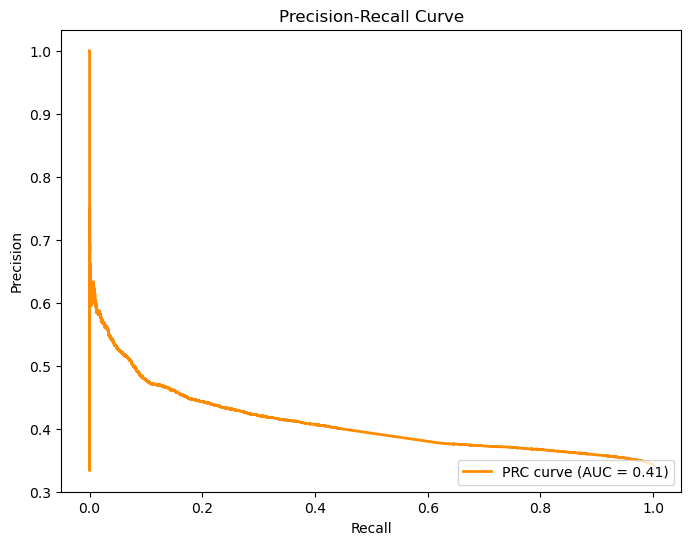

NDCG Scores for each class: [0.8144939213657336, 0.9344994119310968, 0.8661224940541364, 0.917430588049168]
MAP Scores for each class: [0.17046287077030906, 0.48964431530112773, 0.23988399501477334, 0.4069607904409391]


In [63]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

print(y_pred)
print(y_test)

from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score, average_precision_score, roc_auc_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
y_true = y_test
y_scores = y_pred

# Multiclass classification
y_pred_multiclass = np.argmax(y_scores, axis=1)

# Precision, Recall, F1 Score
precision = precision_score(y_true, y_pred_multiclass, average='weighted')
recall = recall_score(y_true, y_pred_multiclass, average='weighted')
f1 = f1_score(y_true, y_pred_multiclass, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# ROC-AUC (micro)
fpr, tpr, thresholds = roc_curve(y_true, y_scores[:, 3], pos_label=3)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve (micro)
precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_scores[:, 3], pos_label=3)
prc_auc = auc(recall_curve, precision_curve)

# Plot ROC Curve (micro)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve (micro)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label='PRC curve (AUC = {:.2f})'.format(prc_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# NDCG and MAP (for each class)
ndcg_scores = []
map_scores = []

for class_label in np.unique(y_true):
    y_true_class = (y_true == class_label).astype(int)
    y_scores_class = y_scores[:, class_label]

    # NDCG
    ndcg_class = ndcg_score([y_true_class], [y_scores_class])
    ndcg_scores.append(ndcg_class)

    # MAP
    map_class = average_precision_score(y_true_class, y_scores_class)
    map_scores.append(map_class)

print(f'NDCG Scores for each class: {ndcg_scores}')
print(f'MAP Scores for each class: {map_scores}')